<a href="https://colab.research.google.com/github/mShubham18/BharatIntern-DS/blob/main/TASK%203/Task_3_Internship_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split

In [8]:
image_dir = Path('/content/drive/MyDrive/Snapu/Dog and Cat')

In [9]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [10]:
image_df

,Filepath,Label
0,/content/drive/MyDrive/Snapu/Dog and Cat/Dog/d...,Dog
1,/content/drive/MyDrive/Snapu/Dog and Cat/Dog/d...,Dog
2,/content/drive/MyDrive/Snapu/Dog and Cat/Dog/d...,Dog
3,/content/drive/MyDrive/Snapu/Dog and Cat/Dog/d...,Dog
4,/content/drive/MyDrive/Snapu/Dog and Cat/Dog/d...,Dog
...,...,...
994,/content/drive/MyDrive/Snapu/Dog and Cat/Cat/t...,Cat
995,/content/drive/MyDrive/Snapu/Dog and Cat/Cat/t...,Cat
996,/content/drive/MyDrive/Snapu/Dog and Cat/Cat/t...,Cat
997,/content/drive/MyDrive/Snapu/Dog and Cat/Cat/t...,Cat


In [11]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)


test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = val_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 560 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [14]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100
18/18 [==============================] - 125s 7s/step - loss: 0.6935 - accuracy: 0.4857 - val_loss: 0.6912 - val_accuracy: 0.5899 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - 32s 2s/step - loss: 0.6917 - accuracy: 0.5179 - val_loss: 0.6894 - val_accuracy: 0.5396 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - 34s 2s/step - loss: 0.6891 - accuracy: 0.5446 - val_loss: 0.6874 - val_accuracy: 0.6331 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - 33s 2s/step - loss: 0.6844 - accuracy: 0.5714 - val_loss: 0.6844 - val_accuracy: 0.5971 - lr: 0.0010
Epoch 5/100
18/18 [==============================] - 33s 2s/step - loss: 0.6758 - accuracy: 0.5875 - val_loss: 0.6740 - val_accuracy: 0.5468 - lr: 0.0010
Epoch 6/100
18/18 [==============================] - 34s 2s/step - loss: 0.6596 - accuracy: 0.6107 - val_loss: 0.6776 - val_accuracy: 0.5252 - lr: 0.0010
Epoch 7/100
18/18 [==============================] - 34s 2s/step - loss: 0.

In [17]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model2.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100
18/18 [==============================] - 43s 2s/step - loss: 0.6944 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4964 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - 33s 2s/step - loss: 0.6939 - accuracy: 0.5036 - val_loss: 0.6929 - val_accuracy: 0.5036 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - 35s 2s/step - loss: 0.6939 - accuracy: 0.5018 - val_loss: 0.6928 - val_accuracy: 0.6187 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - 36s 2s/step - loss: 0.6941 - accuracy: 0.4964 - val_loss: 0.6923 - val_accuracy: 0.5324 - lr: 0.0010
Epoch 5/100
18/18 [==============================] - 34s 2s/step - loss: 0.6930 - accuracy: 0.4929 - val_loss: 0.6910 - val_accuracy: 0.5612 - lr: 0.0010
Epoch 6/100
18/18 [==============================] - 33s 2s/step - loss: 0.6906 - accuracy: 0.5589 - val_loss: 0.6891 - val_accuracy: 0.4964 - lr: 0.0010
Epoch 7/100
18/18 [==============================] - 32s 2s/step - loss: 0.6

In [15]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.64491
Test Accuracy: 61.67%


In [18]:
results2 = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results2[0]))
print("Test Accuracy: {:.2f}%".format(results2[1] * 100))

    Test Loss: 0.64491
Test Accuracy: 61.67%


10/10 [==============================] - 4s 370ms/step


<ipython-input-19-3fcf80f737cf>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = (model.predict(test_images) >= 0.5).astype(np.int)


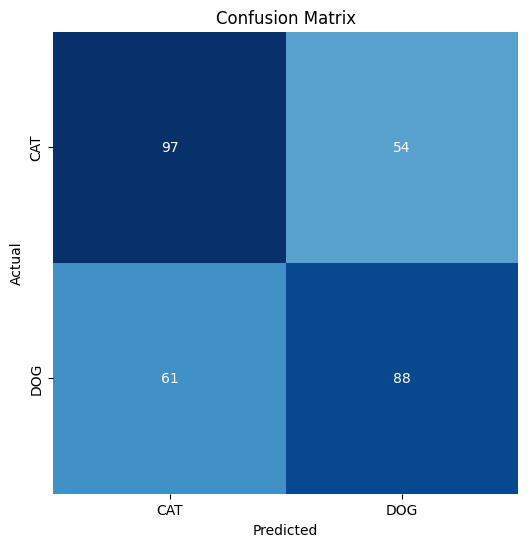

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.61      0.64      0.63       151
         DOG       0.62      0.59      0.60       149

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



In [19]:
predictions = (model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)